In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils import check_array, check_X_y
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import cross_val_score

## Kernel Regression

In [17]:
class KernelRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, K=None, h=None):
        self.K = K
        self.h = h
        
    def fit(X, y):
        _X, _y = check_X_y(X, y)
        self._X = _X
        self._y = _y
    
    def predict(self, X):
        dists = self.K(pairwise_distances(X, self._X)/self._h)
        num = np.sum(dists*self._y.reshpae(1, -1), axis = 1)
        denom = np.sum(dists, axis = 1)
        return num/denom
    
def B(u):
    return 0.5 * (np.abs(u) < 1)

def T(u):
    return (1 - np.abs(u)) * (np.abs(u) < 1)

def G(u):
    return np.exp(-np.square(u)/2)/np.sqrt(2*np.pi)

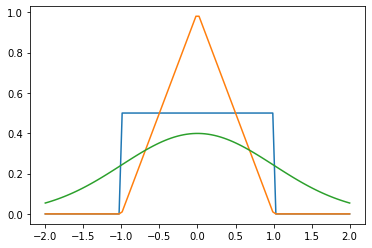

In [10]:
t = np.linspace(-2, 2, 100)
plt.plot(t, B(t))
plt.plot(t, T(t))
plt.plot(t, G(t))

In [8]:
# Pairwise distances explanation

A = np.array(range(4)).reshape(2, 2)
B = np.array(range(4)).reshape(2, 2)
print(A, B)
print(pairwise_distances(A, B))
print(np.linalg.norm(np.array([0, 1]) - np.array([2, 3])))

[[0 1]
 [2 3]] [[0 1]
 [2 3]]
[[0.         2.82842712]
 [2.82842712 0.        ]]
2.8284271247461903


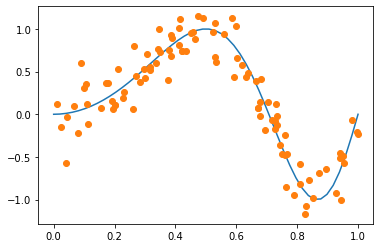

In [14]:
np.random.seed(668)

def y_true(x):
    return np.sin(x*(2*np.pi*x))

t = np.linspace(0, 1)

n = 100
X = np.random.uniform(size=n)
y = y_true(X) + np.random.normal(0, 0.2, size=n)

plt.plot(t, y_true(t))
plt.plot(X, y, 'o')

In [19]:
scores = []
hs = np.arange(0.01, 0.2, 0.02)
for h in hs:
    M = KernelRegressor(K=G, h=h)
    score = np.mean(-cross_val_score(M, X.reshape(-1, 1), y, cv = 5, scoring = "neg_mean_squared_error"))
    scores.append(score)

h_opt = hs[np.argmin(scores)]
print(f"h_opt = {h_opt}")

M = KernelRegressor(K=G, h = h_opt)
M.fit(X.reshape(-1, 1), y)
y_p_G = M.predict(t.reshape(-1, 1))

scores = []
hs = np.arange(0.05, 0.2, 0.01)
for h in hs:
    M = KernelRegressor(K=T, h=h)
    score = np.mean(-cross_val_score(M, X.reshape(-1, 1), y, cv = 5, scoring = "neg_mean_squared_error"))
    scores.append(score)

h_opt = hs[np.argmin(scores)]
print(f"h_opt = {h_opt}")

M = KernelRegressor(K=T, h = h_opt)
M.fit(X.reshape(-1, 1), y)
y_p_T = M.predict(t.reshape(-1, 1))

scores = []
hs = np.arange(0.05, 0.2, 0.01)
for h in hs:
    M = KernelRegressor(K=B, h=h)
    score = np.mean(-cross_val_score(M, X.reshape(-1, 1), y, cv = 5, scoring = "neg_mean_squared_error"))
    scores.append(score)

h_opt = hs[np.argmin(scores)]
print(f"h_opt = {h_opt}")

M = KernelRegressor(K=B, h = h_opt)
M.fit(X.reshape(-1, 1), y)
y_p_B = M.predict(t.reshape(-1, 1))

[[a0, a1], [a2, a3]], fig = plt.subplots(2, 2, figsize = (20, 10))
a0.plt.plot(t, y_true(t))
a0.plt.plot(t, y_p_G, lw=5)

a1.plt.plot(t, y_true(t))
a1.plt.plot(t, y_p_T, lw=5)

a2.plt.plot(t, y_true(t))
a2.plt.plot(t, y_p_B, lw=5)

SyntaxError: EOL while scanning string literal (<ipython-input-19-648b6e446825>, line 11)

In [ ]:
plt.plot(t, y_true(t))
plt.plot(t, y_p, lw=5)